# Initial exploration of News Dataset

Data obtained from: https://www.kaggle.com/datasets/victornuez/google-news-uk-2010-2024


In [2]:
import pandas as pd
import numpy as np

In [22]:
df = pd.read_pickle('../data/embeddings/embeddings.pkl')


,title,published,source,category,embeddings
0,"The gift of Gabby: Gabby Logan on politics, mo...","Mon, 11 Jan 2010 08:00:00 GMT",www.independent.co.uk,Politics,"[0.4131637513637543, 0.46287062764167786, -0.6..."
1,Politics is full of slippery evasive liars: Af...,"Tue, 26 Jan 2010 08:00:00 GMT",www.dailymail.co.uk,Politics,"[0.4728592336177826, -0.5222621560096741, 0.09..."
2,BBC Comedy Blog: Mark Watson responds to Polit...,"Fri, 15 Jan 2010 08:00:00 GMT",www.bbc.co.uk,Politics,"[0.8587824702262878, -0.11536829173564911, -0...."
3,German politics set for shake-up as cancer for...,"Tue, 26 Jan 2010 08:00:00 GMT",www.independent.co.uk,Politics,"[0.41791290044784546, -0.42749443650245667, 0...."
4,The Big Question: What is the Tea Party moveme...,"Fri, 22 Jan 2010 08:00:00 GMT",www.independent.co.uk,Politics,"[0.2659107446670532, 0.28162282705307007, -0.2..."
...,...,...,...,...,...
69583,US campus protests live updates: Order must pr...,"Thu, 02 May 2024 04:00:00 GMT",www.bbc.co.uk,Police,"[-0.318707138299942, -0.6377164721488953, -0.0..."
69584,"Coleraine: Police seize drugs, cash and suspec...","Fri, 03 May 2024 20:31:51 GMT",www.bbc.co.uk,Police,"[-1.0466634035110474, -0.26788923144340515, 0...."
69585,Dangerous driver jailed after high-speed pursu...,"Fri, 03 May 2024 10:00:00 GMT",www.nottinghamshire.police.uk,Police,"[-0.8588036298751831, 0.07297252118587494, -0...."
69586,Burglar's photos of stolen goods led police to...,"Thu, 02 May 2024 11:10:00 GMT",www.kent.police.uk,Police,"[0.09223167598247528, -0.3675365447998047, -0...."


In [4]:
embedding = np.vstack(df['embeddings'].values)

In [19]:
# create one-hot encoding for the labels
df = pd.get_dummies(df, columns=['category'], dtype=int, )

# Get a list of the label columns and add a new column for the category
label_columns = df.columns[4:]
df['category_nr'] = np.argmax(df[label_columns].values, axis=1)

In [21]:
df.head()

,title,published,source,embeddings,category_Crime,category_Culture,category_Economy,category_Education,category_Entertainment,category_Environment,category_Health,category_International,category_Police,category_Politics,category_Science,category_Sports,category_Technology,category_Travel,category_nr
0,"The gift of Gabby: Gabby Logan on politics, mo...","Mon, 11 Jan 2010 08:00:00 GMT",www.independent.co.uk,"[0.4131637513637543, 0.46287062764167786, -0.6...",0,0,0,0,0,0,0,0,0,1,0,0,0,0,9
1,Politics is full of slippery evasive liars: Af...,"Tue, 26 Jan 2010 08:00:00 GMT",www.dailymail.co.uk,"[0.4728592336177826, -0.5222621560096741, 0.09...",0,0,0,0,0,0,0,0,0,1,0,0,0,0,9
2,BBC Comedy Blog: Mark Watson responds to Polit...,"Fri, 15 Jan 2010 08:00:00 GMT",www.bbc.co.uk,"[0.8587824702262878, -0.11536829173564911, -0....",0,0,0,0,0,0,0,0,0,1,0,0,0,0,9
3,German politics set for shake-up as cancer for...,"Tue, 26 Jan 2010 08:00:00 GMT",www.independent.co.uk,"[0.41791290044784546, -0.42749443650245667, 0....",0,0,0,0,0,0,0,0,0,1,0,0,0,0,9
4,The Big Question: What is the Tea Party moveme...,"Fri, 22 Jan 2010 08:00:00 GMT",www.independent.co.uk,"[0.2659107446670532, 0.28162282705307007, -0.2...",0,0,0,0,0,0,0,0,0,1,0,0,0,0,9


In [7]:
from sklearn.manifold import TSNE

In [8]:
# print number of belonging to each category
print(df['category'].value_counts())
# sum of all categories should be equal to the number of rows
assert df['category'].value_counts().sum() == df.shape[0]
print(df.shape)

category
8     8917
0     6714
13    6479
6     6422
3     5195
11    5027
4     5018
9     4478
7     4408
10    4327
1     3267
5     3197
2     3179
12    2960
Name: count, dtype: int64
(69588, 19)


In [9]:
print(label_columns)

Index(['category_Crime', 'category_Culture', 'category_Economy',
       'category_Education', 'category_Entertainment', 'category_Environment',
       'category_Health', 'category_International', 'category_Police',
       'category_Politics', 'category_Science', 'category_Sports',
       'category_Technology', 'category_Travel'],
      dtype='object')


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 69588 samples in 0.014s...


/Users/halvortyseng/Desktop/FYS5429/.venv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computed neighbors for 69588 samples in 64.449s...
[t-SNE] Computed conditional probabilities for sample 1000 / 69588
[t-SNE] Computed conditional probabilities for sample 2000 / 69588
[t-SNE] Computed conditional probabilities for sample 3000 / 69588
[t-SNE] Computed conditional probabilities for sample 4000 / 69588
[t-SNE] Computed conditional probabilities for sample 5000 / 69588
[t-SNE] Computed conditional probabilities for sample 6000 / 69588
[t-SNE] Computed conditional probabilities for sample 7000 / 69588
[t-SNE] Computed conditional probabilities for sample 8000 / 69588
[t-SNE] Computed conditional probabilities for sample 9000 / 69588
[t-SNE] Computed conditional probabilities for sample 10000 / 69588
[t-SNE] Computed conditional probabilities for sample 11000 / 69588
[t-SNE] Computed conditional probabilities for sample 12000 / 69588
[t-SNE] Computed conditional probabilities for sample 13000 / 69588
[t-SNE] Computed conditional probabilities for sample 14000 / 6958

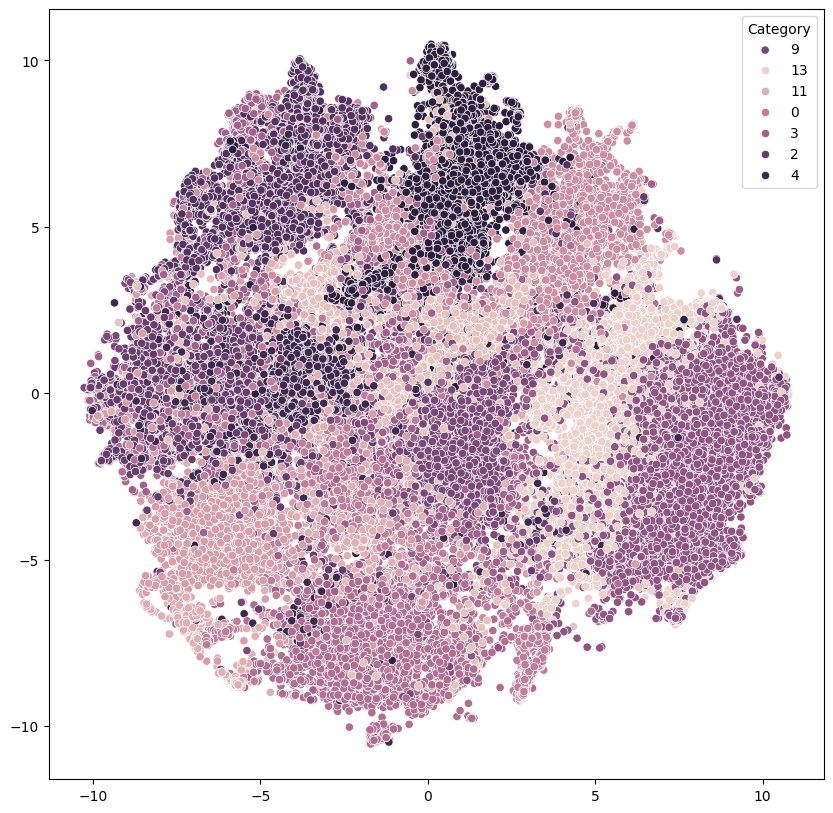

In [10]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(embedding)

# plot the results
# with a color for each category
# with a legend for the categories 
import matplotlib.pyplot as plt
import seaborn as sns

x = tsne_results[:,0]
y = tsne_results[:,1]

fig, ax = plt.subplots(figsize=(10,10))
sns.set_palette('bright')
sns.scatterplot(x=x, y=y, hue=df['category'], ax=ax)
plt.legend(title='Category', loc='upper right', labels=df['category'].unique())
plt.show()
